In [72]:
# import lib
import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from kumaraswamy import kumaraswamy
sns.set_style('darkgrid')
np.random.seed(42)

In [86]:
# Define the multi-armed bandits
nb_bandits = 3  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.25, 0.55, 0.90]

def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(-0.5, 1.5, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    #ax.set_xlim([0, 1])
    #ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
    
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

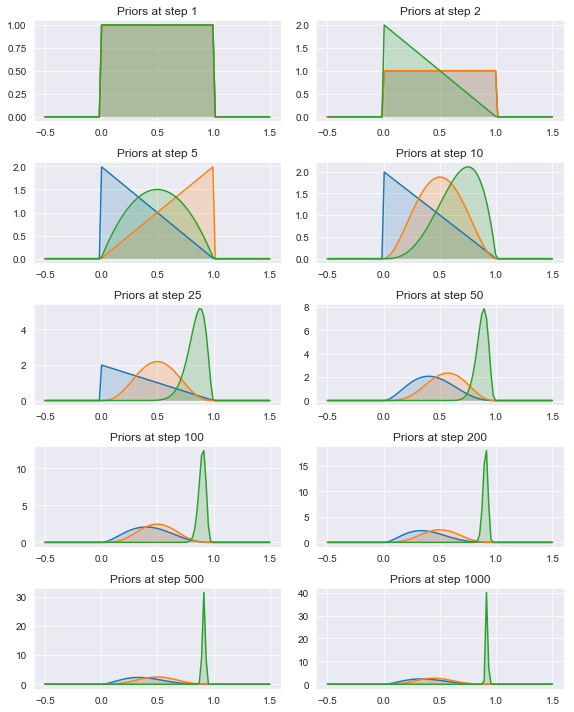

True prob=0.25;  Emperical prob=0.43;  Trials=6; wins=2; 
True prob=0.55;  Emperical prob=0.50;  Trials=9; wins=4; 
True prob=0.90;  Emperical prob=0.92;  Trials=985; wins=905; 
Total win:  911


In [91]:
# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [stats.beta (a=1+w,b=1+t-w) for t, w in zip(trials, wins)]

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}; '
           f'wins={wins[i]:d}; '
          ))
print('Total win: ',sum(wins))

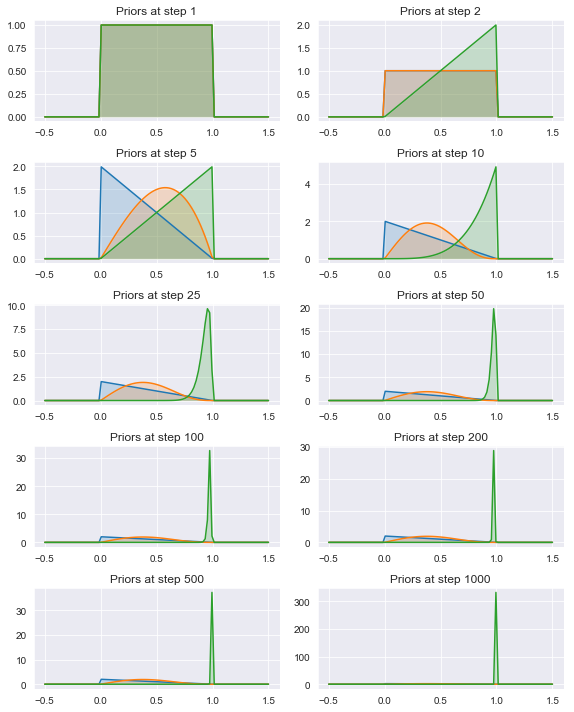

True prob=0.25;  Emperical prob=0.50;  Trials=1
True prob=0.55;  Emperical prob=0.40;  Trials=4
True prob=0.90;  Emperical prob=0.92;  Trials=995


In [88]:
# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [kumaraswamy(a=1+w,b=1+t-w) for t, w in zip(trials, wins)]

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

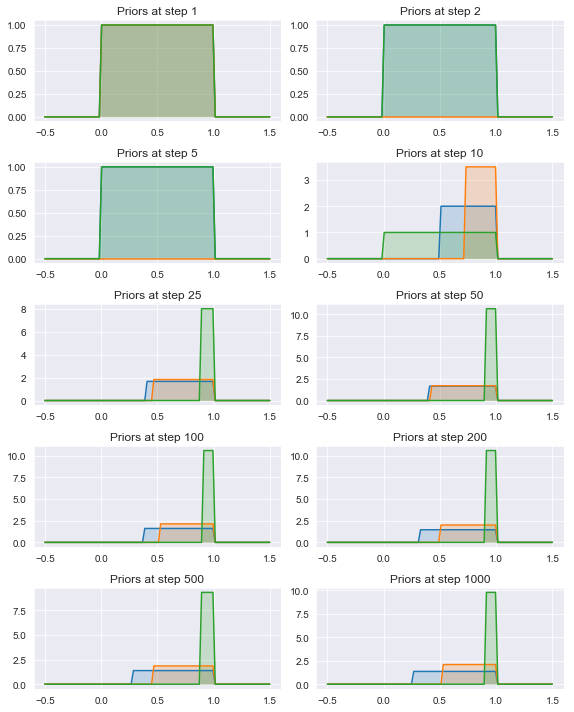

True prob=0.25;  Emperical prob=0.28;  Trials=64
True prob=0.55;  Emperical prob=0.53;  Trials=113
True prob=0.90;  Emperical prob=0.90;  Trials=823


In [89]:
# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [stats.uniform(w/(t+0.000000001),1-w/(t+0.000000001)) for t, w in zip(trials, wins)]

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

[ 0.20264065 -0.3246262  -1.66632893  2.26444456  1.16672842]


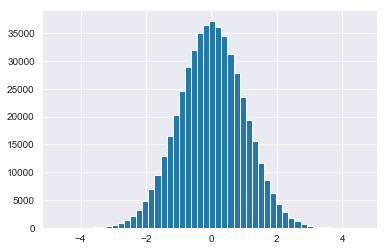

In [22]:
from scipy.stats import norm
gen = norm()
print(gen.rvs(size=5))
plt.hist(gen.rvs(size=500000),50)
plt.show()

# Reference 
1. Kite - AI-Powered Python Copilot. (2019). Kite.com. Retrieved 9 January 2019, from https://kite.com/python/docs/scipy.stats.distributions.rv_frozen.rvs
2. Multi-armed bandit implementation. (2019). Peterroelants.github.io. Retrieved 9 January 2019, from https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
3. kumaraswamy. (2018). PyPI. Retrieved 9 January 2019, from https://pypi.org/project/kumaraswamy/
